In [ ]:
!pip install ipython-autotime
!apt-get install openslide-tools
!pip install openslide-python
%load_ext autotime

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 1s (149 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from openslide import open_slide, __library_version__ as openslide_version
import seaborn as sns; sns.set_theme()
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
import os
from PIL import Image

time: 866 ms (started: 2021-04-29 14:38:22 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
tf.__version__

'2.4.1'

time: 14.6 ms (started: 2021-04-29 14:49:04 +00:00)


In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/
time: 15.1 s (started: 2021-04-29 14:38:33 +00:00)


## Inception Model with Data Augmentation

In [ ]:
PATCH_SIZE = 75 # size of the patches
LEVEL = 4
LEVEL_1 = 4 # first zoom level
LEVEL_2 = 3 # second zoom level
dataset_path = "/content/drive/MyDrive/Columbia_Assignments/ADL/Project/dataset"

train_file_normal = os.path.join(dataset_path, 'train/camelyon_preprocessed_level' + str(LEVEL_1) + '_' + str(LEVEL_2)+ '_unbalanced.pkl')
train_file_zoomed = os.path.join(dataset_path, 'train/camelyon_preprocessed_level' + str(LEVEL_1) + '_' + str(LEVEL_2)+ 'zoomed_unbalanced.pkl')

test_file_normal = os.path.join(dataset_path, 'test/camelyon_preprocessed_test_level' + str(LEVEL_1) + '_' + str(LEVEL_2)+ '_unbalanced.pkl')
test_file_zoomed = os.path.join(dataset_path, 'test/camelyon_preprocessed_test_level' + str(LEVEL_1) + '_' + str(LEVEL_2)+ 'zoomed_unbalanced.pkl')

time: 9.71 ms (started: 2021-04-29 14:43:11 +00:00)


### Load train and test dataset

Load the data from the pickle file uploaded to the drive. 

In [ ]:
def load_dataset(file_path):
    with open(file_path, 'rb') as f:
        slides, labels = pickle.load(f)
    return slides, labels

time: 2.54 ms (started: 2021-04-29 14:40:29 +00:00)


In [ ]:
# load the training dataset and labels

train_slides, train_labels = load_dataset(train_file_normal)
train_slides = np.array(train_slides)
train_labels = np.array(train_labels)
print("Training slides length: {}".format(len(train_slides)))
print("Train labels: {}".format(train_labels))
print("Number of cancerous labels: {}".format(np.sum(train_labels)))

Training slides length: 30065
Train labels: [0 0 0 ... 0 0 0]
Number of cancerous labels: 2016
time: 9.98 s (started: 2021-04-29 17:27:51 +00:00)


In [ ]:
# load the zoomed training dataset and labels

train_zoomed_slides, train_labels = load_dataset(train_file_zoomed)
train_zoomed_slides = np.array(train_zoomed_slides)
train_labels = np.array(train_labels)
print("Training slides length: {}".format(len(train_zoomed_slides)))
print("Train labels: {}".format(train_labels))
print("Number of cancerous labels: {}".format(np.sum(train_labels)))

Training slides length: 30065
Train labels: [0 0 0 ... 0 0 0]
Number of cancerous labels: 2016
time: 3.47 s (started: 2021-04-29 16:36:10 +00:00)


In [ ]:
# load the test dataset and labels

test_slides, test_labels = load_dataset(test_file_normal)
test_slides = np.array(test_slides)
test_labels = np.array(test_labels)
print("Test slides length: {}".format(len(test_slides)))
print("Test labels: {}".format(test_labels))
print("Number of cancerous labels: {}".format(np.sum(test_labels)))

Test slides length: 11446
Test labels: [0 0 0 ... 0 0 0]
Number of cancerous labels: 1149
time: 4.63 s (started: 2021-04-29 14:43:15 +00:00)


In [ ]:
# load the zoomed test dataset and labels

test_zoomed_slides, test_labels = load_dataset(test_file_zoomed)
test_zoomed_slides = np.array(test_zoomed_slides)
test_labels = np.array(test_labels)
print("Test slides length: {}".format(len(test_zoomed_slides)))
print("Test labels: {}".format(test_labels))
print("Number of cancerous labels: {}".format(np.sum(test_labels)))

Test slides length: 11446
Test labels: [0 0 0 ... 0 0 0]
Number of cancerous labels: 1149
time: 2.72 s (started: 2021-04-29 16:40:16 +00:00)


### Split the training dataset into validation

In [ ]:
train_slides, val_slides, train_zoomed_slides, val_zoomed_slides, train_labels, val_labels = train_test_split(train_slides, train_zoomed_slides, train_labels)
print("Validation slides length: {}".format(len(val_slides)))
print("Validation zoomed slides length: {}".format(len(val_zoomed_slides)))
print("Validation labels: {}".format(val_labels))
print("Number of cancerous labels: {}".format(np.sum(val_labels)))

Validation slides length: 7517
Validation zoomed slides length: 7517
Validation labels: [1 0 0 ... 0 0 0]
Number of cancerous labels: 494
time: 1.02 s (started: 2021-04-29 14:46:23 +00:00)


### Define the model

#### Data Augmentation

In [ ]:
# adding a data augmentation layer to the model
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(PATCH_SIZE, PATCH_SIZE, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    # layers.experimental.preprocessing.RandomZoom(0.2)
  ]
)

time: 148 ms (started: 2021-04-29 17:22:52 +00:00)


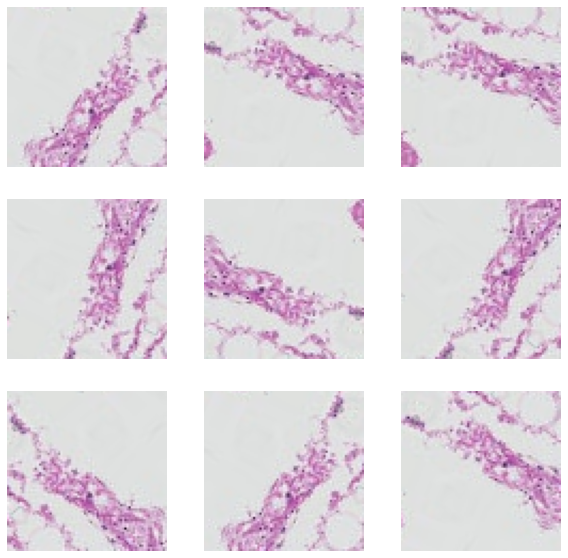

time: 2.25 s (started: 2021-04-29 17:24:54 +00:00)


In [ ]:
# displaying some patches with data augmentation
plt.figure(figsize=(10, 10))
image = train_slides[19]
for i in range(9):
    image_expand = tf.expand_dims(image, axis=0)
    augmented_images = data_augmentation(image_expand)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0])
    plt.axis("off")

#### Two Inception Models

In [ ]:
# inception model 1 for level = LEVEL_1 images
base_model_1 = tf.keras.applications.InceptionV3(input_shape=[PATCH_SIZE, PATCH_SIZE, 3], include_top=False)
base_model_1.trainable = False

# global average layer
global_average_layer = GlobalAveragePooling2D()
dense = Dense(16, activation='relu')

model_1 = Sequential()
model_1.add(data_augmentation)
model_1.add(base_model_1)
model_1.add(global_average_layer)
model_1.add(dense)

level_1_input = Input(shape=(PATCH_SIZE, PATCH_SIZE, 3))
level_1_image = model_1(level_1_input)

time: 6.89 s (started: 2021-04-29 17:26:18 +00:00)


In [ ]:
# inception model 1 for level = LEVEL_1 images
base_model_2 = tf.keras.applications.InceptionV3(input_shape=[PATCH_SIZE, PATCH_SIZE, 3], include_top=False)
base_model_2.trainable = False

# global average layer
global_average_layer = GlobalAveragePooling2D()
dense = Dense(16, activation='relu')

model_2 = Sequential()
model_2.add(data_augmentation)
model_2.add(base_model_2)
model_2.add(global_average_layer)
model_2.add(dense)

level_2_input = Input(shape=(PATCH_SIZE, PATCH_SIZE, 3))
level_2_image = model_2(level_2_input)

time: 5.26 s (started: 2021-04-29 17:26:29 +00:00)


In [ ]:
# concatenating the outputs from the two models
concat_layer = keras.layers.concatenate([level_1_image, level_2_image])
output = Dense(1, activation='sigmoid')(concat_layer)

# final model
model = Model(inputs=[level_1_input, level_2_input], outputs=output)

time: 34.1 ms (started: 2021-04-29 17:26:36 +00:00)


In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

time: 28.9 ms (started: 2021-04-29 17:26:39 +00:00)


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 16)           21835568    input_6[0][0]                    
__________________________________________________________________________________________________
sequential_9 (Sequential)       (None, 16)           21835568    input_8[0][0]                    
____________________________________________________________________________________________

### Plot the model for visualization

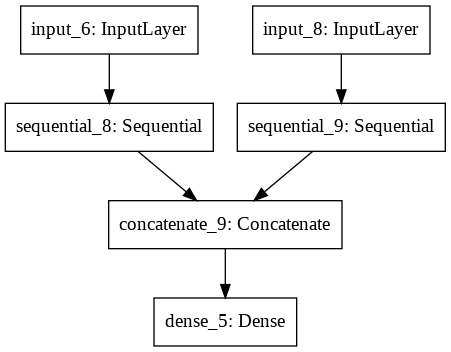

time: 1.02 s (started: 2021-04-29 17:27:12 +00:00)


In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

### Training the model

In [ ]:
EPOCHS = 10
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
history = model.fit(
    [train_slides, train_zoomed_slides],
    train_labels,
    validation_data=([val_slides, val_zoomed_slides], val_labels),
    callbacks=callbacks,
    epochs=EPOCHS
)

Epoch 1/10
940/940 [==============================] - 688s 720ms/step - loss: 0.1822 - accuracy: 0.9460 - val_loss: 0.1440 - val_accuracy: 0.9565
Epoch 2/10
940/940 [==============================] - 658s 700ms/step - loss: 0.1496 - accuracy: 0.9541 - val_loss: 0.1462 - val_accuracy: 0.9530
Epoch 3/10
940/940 [==============================] - 659s 701ms/step - loss: 0.1437 - accuracy: 0.9557 - val_loss: 0.1358 - val_accuracy: 0.9574
Epoch 4/10
940/940 [==============================] - 659s 702ms/step - loss: 0.1363 - accuracy: 0.9563 - val_loss: 0.1427 - val_accuracy: 0.9561
Epoch 5/10
940/940 [==============================] - 651s 693ms/step - loss: 0.1357 - accuracy: 0.9586 - val_loss: 0.1352 - val_accuracy: 0.9561
Epoch 6/10
940/940 [==============================] - 648s 689ms/step - loss: 0.1372 - accuracy: 0.9558 - val_loss: 0.1356 - val_accuracy: 0.9566
Epoch 7/10
940/940 [==============================] - 651s 693ms/step - loss: 0.1278 - accuracy: 0.9594 - val_loss: 0.1331 -

In [ ]:
# saving the model
save_filepath = os.path.join(dataset_path, 'model/model_2.h5')
model.save(save_filepath)

time: 2.45 s (started: 2021-04-29 19:23:36 +00:00)


### Plot the graph for accuracy and loss

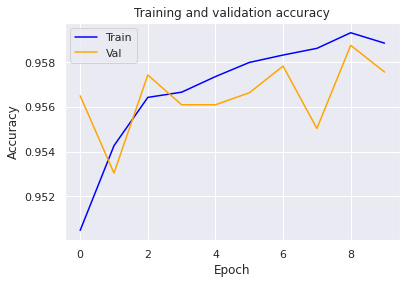

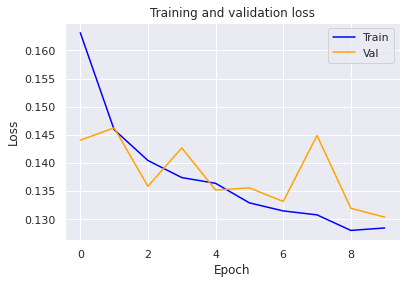

time: 1.24 s (started: 2021-04-29 19:23:46 +00:00)


In [ ]:
# Your code here
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Train')
plt.plot(epochs, val_loss, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Test the model on the test data

In [ ]:
# loading the test tif files to be used for plotting
test_tumor_path = os.path.join(dataset_path, 'test/tumor')
test_tumor_mask_path = os.path.join(dataset_path, 'test/tumor_mask')

test_tumors_tifs = []
test_tumors_mask_tifs = []

for filename in os.listdir(test_tumor_path):
    test_tumors_tifs.append(os.path.join(test_tumor_path, filename))    
for filename in os.listdir(test_tumor_mask_path):
    test_tumors_mask_tifs.append(os.path.join(test_tumor_mask_path, filename))

test_tumors_tifs.sort()
test_tumors_mask_tifs.sort()
print("Length of test tumor tiffs: {}".format(len(test_tumors_tifs)))
print("Length of test tumor mask tiffs: {}".format(len(test_tumors_mask_tifs)))

Length of test tumor tiffs: 2
Length of test tumor mask tiffs: 2
time: 23 ms (started: 2021-04-29 19:38:20 +00:00)


In [ ]:
# create separate test_slides and test_labels for each of the two test tifs

# this corresponds to the number of patches in the row and column of each test
# tif file.
stride_width_array = [116, 78]
stride_height_array = [59, 59]

first_index = stride_height_array[0]*stride_width_array[0]
test_slides_normal_1 = test_slides[:first_index]
test_labels_normal_1 = test_labels[:first_index]

test_slides_normal_2 = test_slides[first_index:]
test_labels_normal_2 = test_labels[first_index:]

print("first_tiff_index: ", first_index)
print("length: ", test_labels_normal_1)
print(np.sum(test_labels_normal_1))

print("length: ", test_labels_normal_2)
print(np.sum(test_labels_normal_2))

first_tiff_index:  6844
length:  [0 0 0 ... 0 0 0]
222
length:  [0 0 0 ... 0 0 0]
927
time: 19.5 ms (started: 2021-04-29 19:38:26 +00:00)


In [ ]:
# create separate test_slides and test_labels for each of the two test tifs
# stride_width_array_zoom = [232, 157]
# stride_height_array_zoom = [119, 119]

# first_tiff_index = PATCH_SIZE * stride_width_array[0] + PATCH_SIZE * stride_height_array[0]
# first_index = stride_height_array_zoom[0]*stride_width_array_zoom[0]
test_slides_zoomed_1 = test_zoomed_slides[:first_index]
test_labels_zoomed_1 = test_labels[:first_index]

test_slides_zoomed_2 = test_zoomed_slides[first_index:]
test_labels_zoomed_2 = test_labels[first_index:]

print("first_tiff_index: ", first_index)
print("length: ", test_labels_zoomed_1)
print(np.sum(test_labels_zoomed_1))

print("length: ", test_labels_zoomed_2)
print(np.sum(test_labels_zoomed_2))

first_tiff_index:  6844
length:  [0 0 0 ... 0 0 0]
222
length:  [0 0 0 ... 0 0 0]
927
time: 16.5 ms (started: 2021-04-29 19:38:30 +00:00)


### Predicting the first test tiff file.

In [ ]:
predictions = model.predict([test_slides_normal_1, test_slides_zoomed_1])

time: 1min 54s (started: 2021-04-29 19:38:33 +00:00)


In [ ]:
print("length of predictions: {}".format(len(predictions)))
print("predictions: {}".format(predictions))

length of predictions: 6844
predictions: [[0.02210265]
 [0.01815641]
 [0.04221612]
 ...
 [0.01344201]
 [0.01127237]
 [0.00645652]]
time: 15.6 ms (started: 2021-04-29 19:40:46 +00:00)


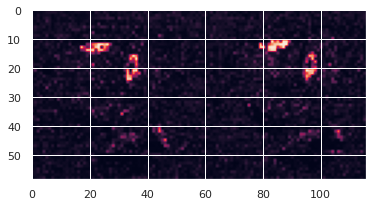

time: 468 ms (started: 2021-04-29 19:40:49 +00:00)


In [ ]:
plt.imshow(np.reshape(predictions, (116, 59)).T)

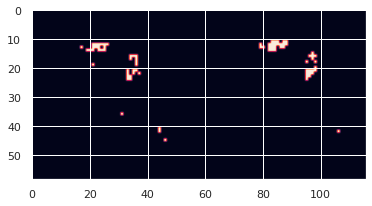

time: 438 ms (started: 2021-04-29 19:41:03 +00:00)


In [ ]:
# plotting the thresholded 
THRESHOLD = 0.5
threshold_predictions = np.where(predictions > THRESHOLD, 1, 0)
plt.imshow(np.reshape(threshold_predictions, (116, 59)).T)

### F1-Score

In [ ]:
from sklearn.metrics import classification_report

classification_metrics = classification_report(threshold_predictions, test_labels_normal_1)
print(classification_metrics)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6763
           1       0.34      0.94      0.50        81

    accuracy                           0.98      6844
   macro avg       0.67      0.96      0.75      6844
weighted avg       0.99      0.98      0.98      6844

time: 25.3 ms (started: 2021-04-29 20:02:20 +00:00)


### Intersection over Union Score

In [ ]:
y_pred_image = np.reshape(threshold_predictions, (116, 59))
y_true_image = np.reshape(test_labels_normal_1, (116, 59))

inter = np.logical_and(y_pred_image, y_true_image)
union = np.logical_or(y_pred_image, y_true_image)

print(np.sum(inter)/float(np.sum(union)))

0.33480176211453744
time: 6.04 ms (started: 2021-04-29 20:08:58 +00:00)


### Heatmap For The test tiff

In [ ]:
# read slide and return an image
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x,y), level, (width, height))
    im = im.convert('RGB') # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im

time: 7.23 ms (started: 2021-04-29 19:41:10 +00:00)


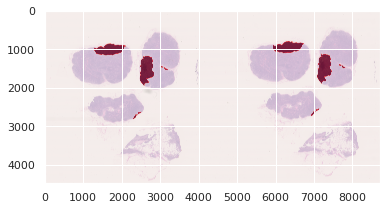

time: 9.54 s (started: 2021-04-29 19:41:12 +00:00)


In [ ]:
# show a slide
tumor_image = open_slide(test_tumors_tifs[0])
mask_image = open_slide(test_tumors_mask_tifs[0])

width = tumor_image.level_dimensions[LEVEL_1][0]
height = tumor_image.level_dimensions[LEVEL_1][1]

tumor_slide = read_slide(tumor_image, 0, 0, LEVEL_1, width=width, height=height)
mask_slide = read_slide(mask_image, 0, 0, LEVEL_1, width=width, height=height)

plt.imshow(tumor_slide)
plt.imshow(mask_slide[:, :, 0], cmap='Reds', alpha=0.7)
plt.show()

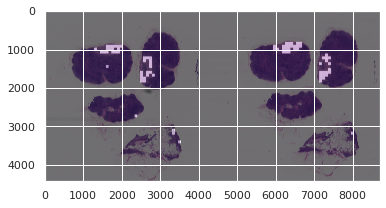

time: 30.9 s (started: 2021-04-29 19:41:45 +00:00)


In [ ]:
# plot the patches to see if patch extraction is working properly
step_width = width // PATCH_SIZE
step_height = height // PATCH_SIZE
canvas_slide = Image.new('RGB', (PATCH_SIZE * step_width, PATCH_SIZE * step_height), 'white')
canvas_mask = Image.new('RGB', (PATCH_SIZE * step_width, PATCH_SIZE * step_height), 'white')
mask_blank = np.zeros((PATCH_SIZE, PATCH_SIZE))
mask_tumor = 255 * np.ones((PATCH_SIZE, PATCH_SIZE))
index = 0

for i in range(step_width):
    for j in range(step_height):
        canvas_slide.paste(Image.fromarray(test_slides_normal_1[index], 'RGB'), (i*PATCH_SIZE, j*PATCH_SIZE))
        if temp[index] == 0:
            canvas_mask.paste(Image.fromarray(mask_blank), (i*PATCH_SIZE, j*PATCH_SIZE))
        else:
            canvas_mask.paste(Image.fromarray(mask_tumor), (i*PATCH_SIZE, j*PATCH_SIZE))
        index += 1

slide_name = 'patch_to_slide.png'
mask_name = 'patch_to_mask.png'
canvas_slide.save(slide_name)
canvas_mask.save(mask_name)
image_slide = plt.imread(slide_name)
image_mask = plt.imread(mask_name)

plt.imshow(image_slide)
plt.imshow(image_mask, cmap='Reds', alpha=0.5)

### Predicting the second tiff file

In [ ]:
predictions_2 = model.predict([test_slides_normal_2, test_slides_zoomed_2])

time: 1min 15s (started: 2021-04-29 19:42:45 +00:00)


In [ ]:
print("length of predictions: {}".format(len(predictions_2)))
print("predictions: {}".format(predictions_2))

length of predictions: 4602
predictions: [[0.04947379]
 [0.03780037]
 [0.02027133]
 ...
 [0.02750137]
 [0.04804933]
 [0.02972835]]
time: 15.6 ms (started: 2021-04-29 19:44:13 +00:00)


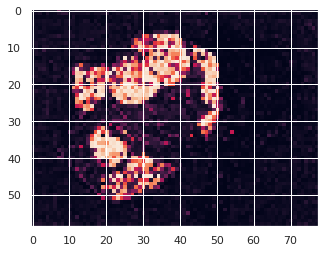

time: 436 ms (started: 2021-04-29 19:44:15 +00:00)


In [ ]:
plt.imshow(np.reshape(predictions_2, (78, 59)).T)

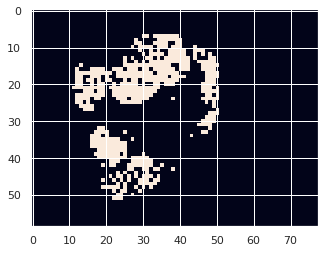

time: 526 ms (started: 2021-04-29 19:44:29 +00:00)


In [ ]:
THRESHOLD = 0.5
threshold_predictions = np.where(predictions_2 > THRESHOLD, 1, 0)
plt.imshow(np.reshape(threshold_predictions, (78, 59)).T)

### Heatmap For The test tiff

In [ ]:
# read slide and return an image
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x,y), level, (width, height))
    im = im.convert('RGB') # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im

time: 15.3 ms (started: 2021-04-29 19:44:37 +00:00)


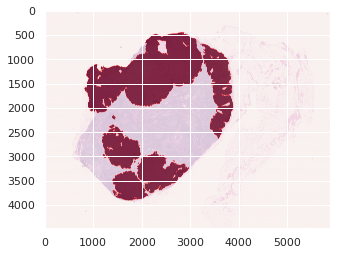

time: 6.8 s (started: 2021-04-29 19:44:39 +00:00)


In [ ]:
# show a slide
tumor_image = open_slide(test_tumors_tifs[1])
mask_image = open_slide(test_tumors_mask_tifs[1])

width = tumor_image.level_dimensions[LEVEL_1][0]
height = tumor_image.level_dimensions[LEVEL_1][1]

tumor_slide = read_slide(tumor_image, 0, 0, LEVEL_1, width=width, height=height)
mask_slide = read_slide(mask_image, 0, 0, LEVEL_1, width=width, height=height)

plt.imshow(tumor_slide)
plt.imshow(mask_slide[:, :, 0], cmap='Reds', alpha=0.7)
plt.show()

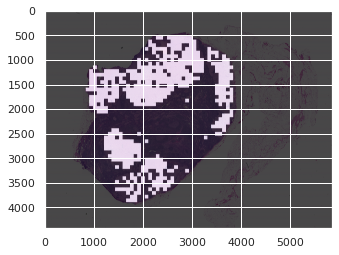

time: 20 s (started: 2021-04-29 19:44:59 +00:00)


In [ ]:
# plot the patches to see if patch extraction is working properly
step_width = width // PATCH_SIZE
step_height = height // PATCH_SIZE
canvas_slide = Image.new('RGB', (PATCH_SIZE * step_width, PATCH_SIZE * step_height), 'white')
canvas_mask = Image.new('RGB', (PATCH_SIZE * step_width, PATCH_SIZE * step_height), 'white')
mask_blank = np.zeros((PATCH_SIZE, PATCH_SIZE))
mask_tumor = 255 * np.ones((PATCH_SIZE, PATCH_SIZE))
index = 0

for i in range(step_width):
    for j in range(step_height):
        canvas_slide.paste(Image.fromarray(test_slides_normal_2[index], 'RGB'), (i*PATCH_SIZE, j*PATCH_SIZE))
        if temp_2[index] == 0:
            canvas_mask.paste(Image.fromarray(mask_blank), (i*PATCH_SIZE, j*PATCH_SIZE))
        else:
            canvas_mask.paste(Image.fromarray(mask_tumor), (i*PATCH_SIZE, j*PATCH_SIZE))
        index += 1

slide_name = 'patch_to_slide.png'
mask_name = 'patch_to_mask.png'
canvas_slide.save(slide_name)
canvas_mask.save(mask_name)
image_slide = plt.imread(slide_name)
image_mask = plt.imread(mask_name)

plt.imshow(image_slide)
plt.imshow(image_mask, cmap='Reds', alpha=0.7)